## Components of a Time Series

A time series is composed of mainly trend, seasonality, and noise. We will take a look at the component parts of a time series, focusing on automated decomposition methods. This will give you some intuition about the components of time series.

### Trend
When we talk about trend, we are talking about how the series data increases or decreases over time.  Is it moving higher or lower over  the time frame? The series is either uptrend or downtrend, both of which are non-stationary.

### Seasonality
Seasonality refers to a repeating periodic or cyclical pattern with regular intervals within a series.  The pattern is within a fixed time period and it repeats itself at regular intervals. There can be upward or downward swings but it continues to repeat over a fixed period of time as in a cycle.  Cyclicality could repeat but it has no fixed period. 

### Noise

In general, noise captures the irregularities or random variation in the series.  It can have erratic events or simply random variation.  It has a short duration.  It is hard to predict due to its erratic occurrence.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot

### Example 1: Google Trend of the Search Term "vacation"

In [2]:
# Read in data that was saved in previous section
# Google Trends, term search for "vacation"
df_vacation = pd.read_csv("D:/Test/df_vacation.csv", parse_dates=['Month'], index_col=0)
df_vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


Text(0.5, 1.0, 'Google Trend of Vacation in 2018')

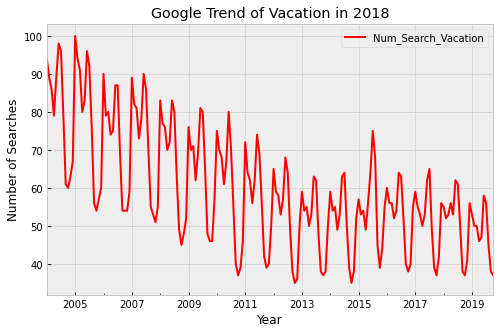

In [3]:
# Plot the time series of google searches of the word "vacation"
plot.style.use('bmh')
ax = df_vacation.plot(color='red', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Searches')
ax.set_title('Google Trend of Vacation in 2018') 

Notice that this series has a downward trend. It has a predictable and repeated pattern due to seasonality.

### Example 2: Furniture and Home Furnishings Sales in Millions of Dollars

In [4]:
# Recall we adjusted the price to July 2019 prices
df_furniture = pd.read_csv("D:/Test/df_furniture.csv", parse_dates=['Month'], index_col=0)
df_furniture.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


Text(0.5, 1.0, 'Retail Sales of Furniture and Home Furnishings Stores')

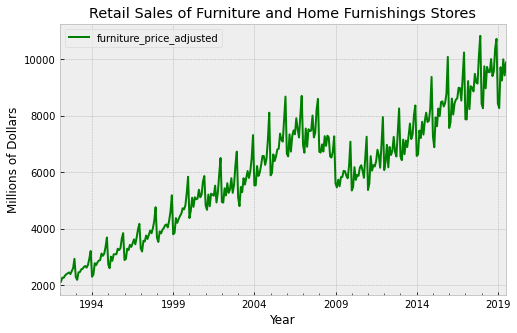

In [5]:
# Plot the time series 
plot.style.use('seaborn-deep')
ax = df_furniture.plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Home Furnishings Stores')

Notice this series has generally an upward trend.  It also has seasonality.

### Example 3: Adjusted Close Stock price for Bank of America

In [6]:

df_bac = pd.read_csv("D:/Test/df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
df_bac.head()

,Adj Close Price
Date,
1990-01-02,1.711862
1990-01-03,1.725632
1990-01-04,1.688917
1990-01-05,1.652200
1990-01-08,1.661379


Text(0.5, 1.0, 'Adjusted Closing Price for Bank of America')

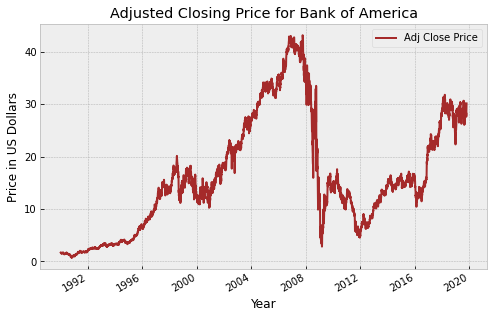

In [7]:
# Plot the time series
plot.style.use('seaborn-bright')
ax = df_bac.plot(color='brown', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Price in US Dollars')
ax.set_title('Adjusted Closing Price for Bank of America')

### Example 4: Adjusted Close Stock price for J.P. Morgan

In [8]:

df_jpm = pd.read_csv("D:/Test/df_jpmorgan.csv", parse_dates=['Date'], index_col=0)
df_jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


Text(0.5, 1.0, 'Adjusted Closing Price for J.P. Morgan')

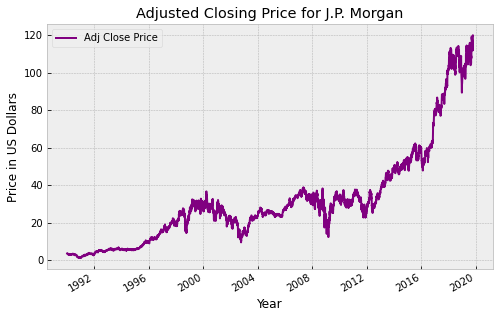

In [9]:
# Plot the time series
plot.style.use('tableau-colorblind10')
ax = df_jpm.plot(color='purple', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Price in US Dollars')
ax.set_title('Adjusted Closing Price for J.P. Morgan')

### Example 5: Monthly Average Temperature of St. Louis

In [10]:
df_temp = pd.read_csv("D:/Test/df_temp.csv", parse_dates=['Date'], index_col=0)
df_temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


Text(0.5, 1.0, 'Average Temperature of St. Louis')

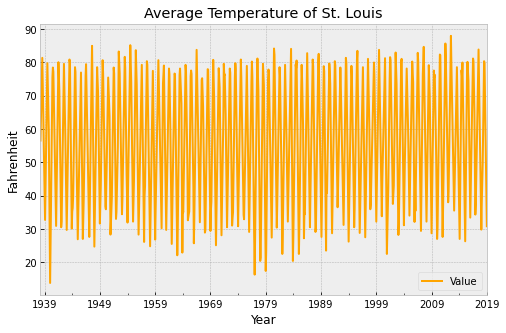

In [11]:
# Plot the time series
plot.style.use('fast')
ax = df_temp.plot(color='orange', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Fahrenheit')
ax.set_title('Average Temperature of St. Louis')

## Modelling Time Series

### Additive Model

An additive model is linear.  y(t) = Level + Trend + Seasonality + Noise

It is useful when the variations around the trend does not vary with the level of the time series. Components are added together.

### Multiplicative Model

A multiplicative model is non-linear:   y(t) = Level * Trend * Seasonality * Noise 

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
It is useful when the trend is proportional to the level of the time series.  Components are multiplied together.

## Decomposing Time Series

### Application of Additive Model

In [12]:
# Example 1:  Google Trends, number of searches of the word "vacation", time series shows seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df_vacation['Num_Search_Vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive', freq=12)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2019-06-01   NaN
2019-07-01   NaN
2019-08-01   NaN
2019-09-01   NaN
2019-10-01   NaN
Name: trend, Length: 190, dtype: float64
Month
2004-01-01    10.648661
2004-02-01     5.320883
2004-03-01     5.079216
2004-04-01    -0.259673
2004-05-01     3.574851
                ...    
2019-06-01    14.530208
2019-07-01    13.501438
2019-08-01    -0.609673
2019-09-01   -14.868006
2019-10-01   -17.076339
Name: seasonal, Length: 190, dtype: float64
Month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2019-06-01   NaN
2019-07-01   NaN
2019-08-01   NaN
2019-09-01   NaN
2019-10-01   NaN
Name: resid, Length: 190, dtype: float64
Month
2004-01-01    94.0
2004-02-01    89.0
2004-03-01    86.0
2004-04-01    79.0
2004-05-01    89.0
              ... 
2019-06-01    58.0
2019-07-01    56.0
2019-08-01    45.0
2019-09-01    38.0
2019-10-01    37.0
Nam

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/2266724683.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts1, model='additive', freq=12)


C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/2667042770.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts1, model='additive',freq=12)


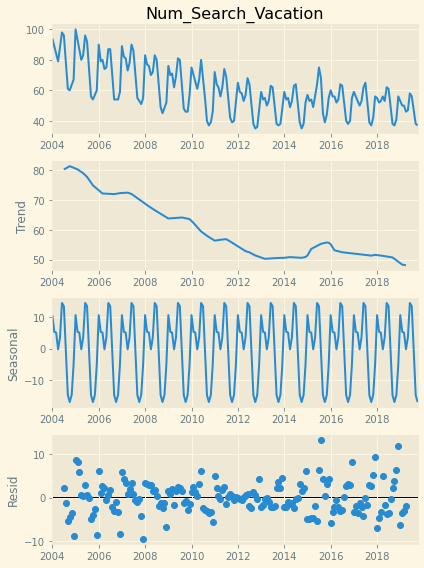

In [13]:
# Example 1:  Google Trends, number of searches of the word "vacation", time series shows seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts1 = df_vacation['Num_Search_Vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive',freq=12)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/521389683.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts2, model='additive',freq=12)


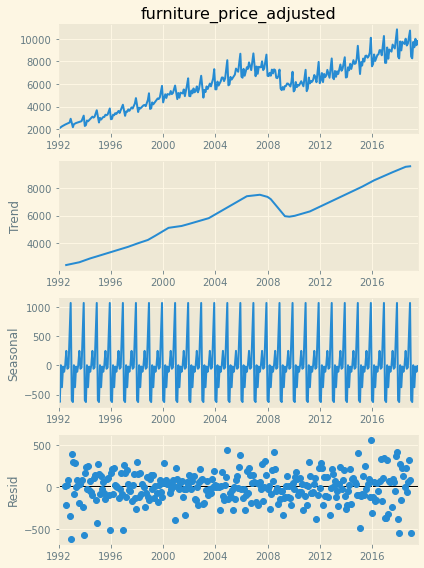

In [14]:
# Example 2:  Furniture sales in Millions of Dollars (adjusted to July 2019 prices)
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts2 = df_furniture['furniture_price_adjusted']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts2, model='additive',freq=12)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/1270794053.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts3, model='additive',freq=365)


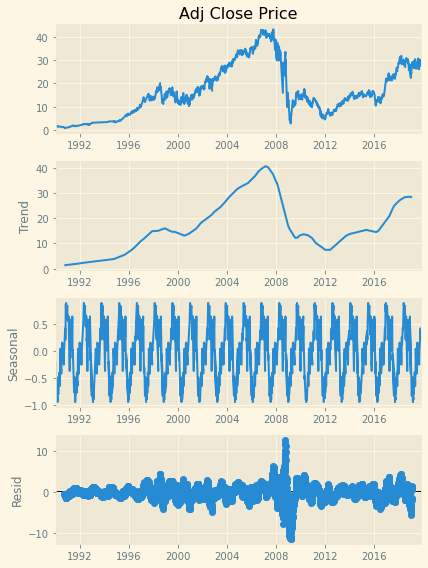

In [15]:
# Example 3: Adjusted Close Price for Bank of America
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts3 = df_bac['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model='additive',freq=365)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/3756499273.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts4, model='additive',freq=365)


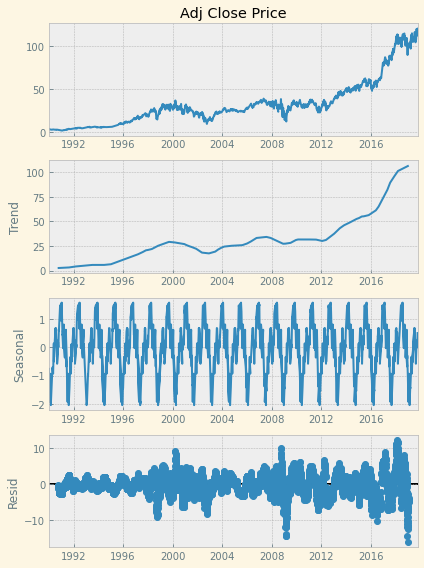

In [16]:
# Example 4: Adjusted Close Price for J.P. Morgan
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts4 = df_jpm['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts4, model='additive',freq=365)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/279530991.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts5, model='additive',freq=12)


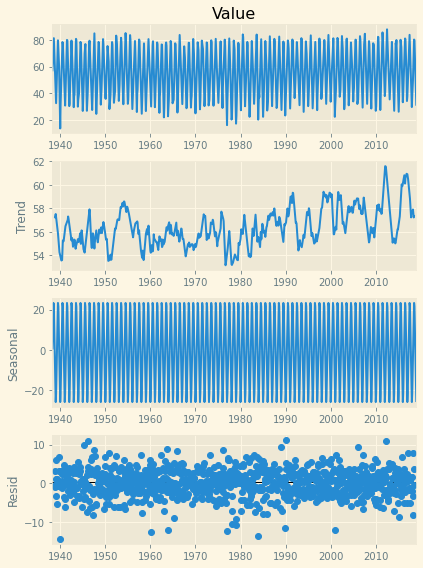

In [17]:
# Example 5: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts5 = df_temp['Value']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model='additive',freq=12)
result.plot()
plot.show()

### Application of Multiplicative Model

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/2143663098.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts1, model='multiplicative', freq=12)


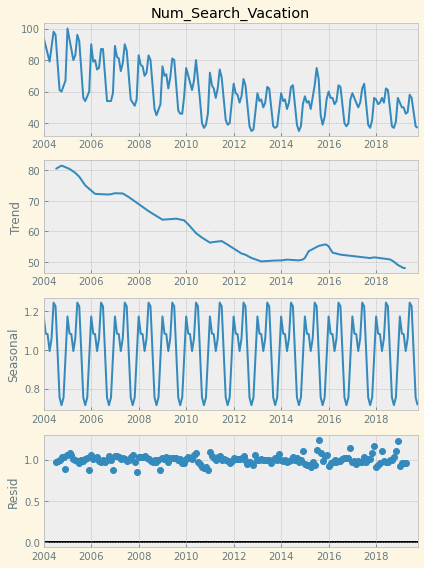

In [18]:
# Example 1:  Google Trends, number of searches of the word "vacation", time series shows seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts1 = df_vacation['Num_Search_Vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='multiplicative', freq=12)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/3533328123.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts2, model='multiplicative', freq=12)


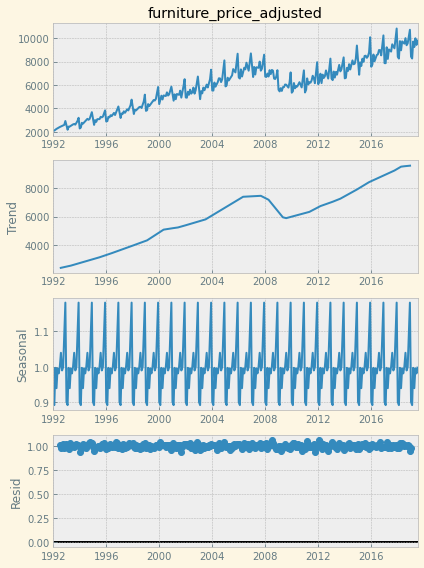

In [19]:
# Example 2:  Furniture sales in Millions of Dollars (adjusted to July 2019 prices)
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts2 = df_furniture['furniture_price_adjusted']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts2, model='multiplicative', freq=12)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/1201170798.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts3, model='multiplicative',freq=365)


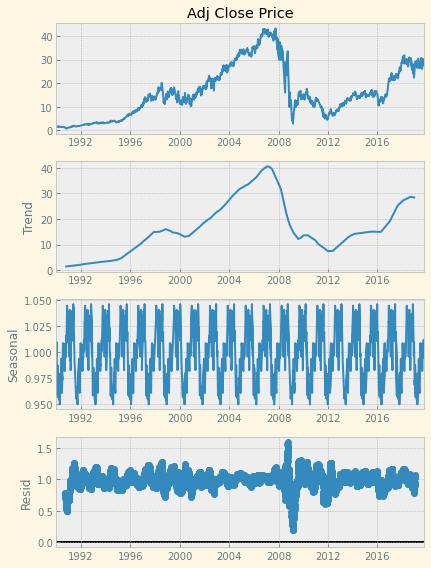

In [20]:
# Example 3: Adjusted Close Price for Bank of America
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts3 = df_bac['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model='multiplicative',freq=365)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/3723406831.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts4, model='multiplicative',freq=365)


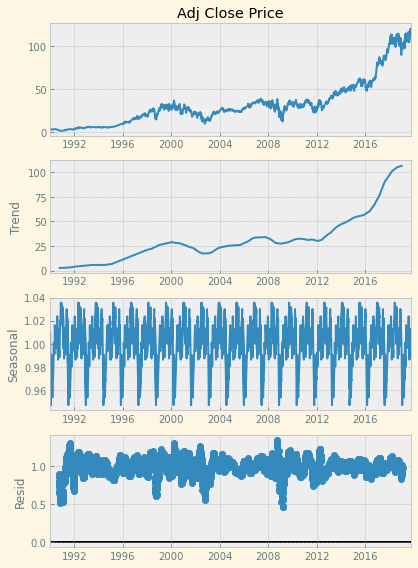

In [21]:
# Example 4: Adjusted Close Price for J.P. Morgan
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts4 = df_jpm['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts4, model='multiplicative',freq=365)
result.plot()
plot.show()

C:\Users\Kiran\AppData\Local\Temp/ipykernel_4684/3807647158.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts5, model='multiplicative',freq=12)


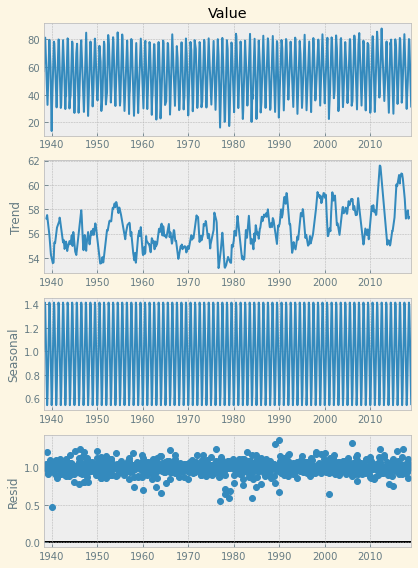

In [22]:
# Example 5: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts5 = df_temp['Value']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model='multiplicative',freq=12)
result.plot()
plot.show()

In [ ]:
# end